In [0]:
# need to specify location of some certificates for rasterio
!export CURL_CA_BUNDLE=/etc/ssl/certs/ca-certificates.crt
!sudo mkdir -p /etc/pki/tls/certs
!sudo cp /etc/ssl/certs/ca-certificates.crt /etc/pki/tls/certs/ca-bundle.crt
try:
  import rasterio
  import rasterio.plot
  import rasterio.merge 
  import rasterio.mask
except:
  !pip install rasterio
  import rasterio
  import rasterio.plot
  import rasterio.merge
  import rasterio.mask
  
try:
  import rasterstats as rs
except:
  !pip install rasterstats  
  import rasterstats as rs
  
try:
  import pyproj
except:
  !pip install pyproj
  import pyproj
  
import networkx as nx
try:
  import osmnx as ox
except:
  # osmnx depends on the system package libspatialindex
  !apt install libspatialindex-dev
  !pip install osmnx
  import osmnx as ox

try: 
  import geopandas as gpd
except: 
  !pip install geopandas 
  import geopandas as gpd
  
try:
  import contextily as ctx 
except:
  # install dependencies for contextily
  !apt install libproj-dev proj-data proj-bin
  !apt install libgeos-dev
  !pip install cython
  !pip install cartopy
  # install contextily
  !pip install contextily==1.0rc1 --no-use-pep517 --no-cache-dir
  import contextily as ctx
  
import fiona
from shapely.geometry import Point, LineString, Polygon
  
import gdal
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/'My Drive'/BWSI-Remote-Sensing/'Final_exercise'

     |████████████████████████████████| 19.7MB 4.1MB/s 
     |████████████████████████████████| 17.9MB 7.5MB/s 
     |████████████████████████████████| 81kB 25.2MB/s 
  Stored in directory: /root/.cache/pip/wheels/5d/1a/1e/0350bb3df3e74215cd91325344cc86c2c691f5306eb4d22c77
  Stored in directory: /root/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built simplejson munch
     |████████████████████████████████| 11.2MB 983kB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex4v5
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
0 upgraded, 3 newly installed, 0 to remove and 7 not upgraded.
Need to get 555 kB of archives

In [0]:
!ls game_grid_export

facilities    flooding.prj  game_grid_all_stats.cpg  game_grid_all_stats.shp
flooding.cpg  flooding.shp  game_grid_all_stats.dbf  game_grid_all_stats.shx
flooding.dbf  flooding.shx  game_grid_all_stats.prj


In [0]:
game_grid = gpd.read_file('game_grid_export/game_grid_all_stats.shp')

In [0]:
flooding = gpd.read_file('game_grid_export/flooding.shp')

In [0]:
hospitals = gpd.read_file('game_grid_export/facilities/hospitals.shp')

In [0]:
small_hospitals = hospitals.loc[hospitals['BEDS']< 200].to_crs(epsg=3857) # 15000m radius

In [0]:
large_hospitals = hospitals.loc[hospitals['BEDS'] >= 200].to_crs(epsg=3857) # 25000m radius

In [0]:
small_hospitals['geometry'] = small_hospitals['geometry'].buffer(15000)

In [0]:
large_hospitals['geometry'] = large_hospitals['geometry'].buffer(25000)

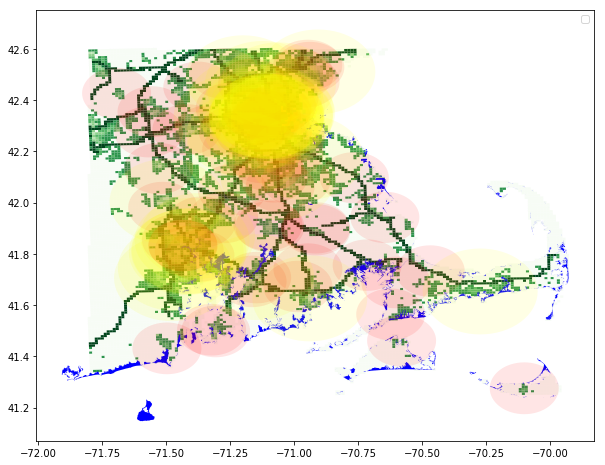

In [0]:
fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(1,1,1)

game_grid.plot(ax=ax, column='Transporta',cmap='Greens')
flooding.to_crs(game_grid.crs).plot(color='blue', ax=ax)
small_hospitals.to_crs(game_grid.crs).plot(color='red', ax=ax, alpha=0.1)
large_hospitals.to_crs(game_grid.crs).plot(color='yellow', ax=ax, alpha=0.1)
ax.legend(['Small Hospitals', 'Large Hospitals'])